## Importando librerías

In [1]:
import tensorflow
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from  tensorflow.keras import models, optimizers, regularizers

2024-11-10 15:22:41.778254: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-10 15:22:41.778284: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-10 15:22:41.778887: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-10 15:22:41.782789: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Creación del modelo convolucional

In [2]:
model = models.Sequential()

model.add(Conv2D(32, (3,3), activation= 'relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

2024-11-10 15:22:43.180507: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-10 15:22:43.207584: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-10 15:22:43.212288: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

## Data augmentation

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

## Reescalar los datos

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory('./cats_and_dogs/train',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

validation_generator = test_datagen.flow_from_directory('./cats_and_dogs/validation',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Callbacks

In [6]:
checkpoint = ModelCheckpoint('modelo_perros_gatos.keras',monitor='val_accuracy', verbose= 1, save_best_only=True)

## Compilando el modelo

In [7]:
model.compile(loss='binary_crossentropy', optimizer =optimizers.Adam(),
             metrics=['accuracy'])

## Entrenando el modelo

In [9]:
hist = model.fit(train_generator, steps_per_epoch=2000//32,
                epochs=100,
                validation_data=validation_generator,
                 validation_steps= 1000//32,
                 callbacks=[checkpoint])

Epoch 1/100


2024-11-10 15:23:07.614604: W external/local_tsl/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 42.78MiB (rounded to 44859392)requested by op sequential/conv2d/Relu
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-11-10 15:23:07.614648: I external/local_tsl/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2024-11-10 15:23:07.614657: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 43, Chunks in use: 42. 10.8KiB allocated for chunks. 10.5KiB in use in bin. 1.3KiB client-requested in use in bin.
2024-11-10 15:23:07.614662: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 6, Chunks in use: 6. 3.0KiB allocated for chunks. 3.0KiB in use in bin. 3.0KiB client-requested in use in bin.
2024-11-10 15

ResourceExhaustedError: Graph execution error:

Detected at node sequential/conv2d/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code

  File "/tmp/ipykernel_10531/3656445495.py", line 1, in <module>

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/engine/training.py", line 1807, in fit

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/activations.py", line 306, in relu

  File "/home/riemannintegrable/anaconda3/envs/tfenv2/lib/python3.11/site-packages/keras/src/backend.py", line 5395, in relu

OOM when allocating tensor with shape[16,32,148,148] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential/conv2d/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1660]

## Resultados

In [ ]:
import matplotlib.pyplot as plt

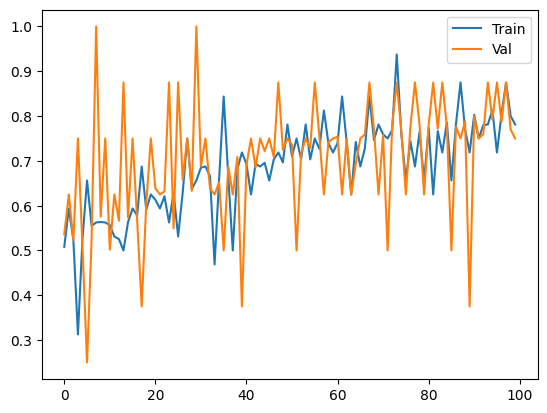

In [ ]:
plt.plot(hist.history['accuracy'], label = 'Train')
plt.plot(hist.history['val_accuracy'], label = 'Val')
plt.legend()
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory('./cats_and_dogs/test',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 1000 images belonging to 2 classes.


In [ ]:
model2 = model 

In [ ]:
model2.load_weights('./modelo_perros_gatos.keras')

In [ ]:
model2.evaluate(test_generator)

 7/32 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5451 - loss: 0.6872

/home/riemannintegrable/anaconda3/envs/dsenv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5264 - loss: 0.7096


[0.7146673798561096, 0.5189999938011169]